# Unsupervised Learning Models
## Lecture Notebook Part 4 of 6

---

## Learning Objectives

By the end of this notebook, you will be able to:
1. Understand unsupervised learning and its applications
2. Implement and evaluate clustering algorithms (K-Means, Hierarchical, DBSCAN)
3. Understand dimensionality reduction techniques (PCA, t-SNE)
4. Evaluate unsupervised learning models
5. Choose appropriate unsupervised learning methods for different problems


## 4.1 Introduction to Unsupervised Learning

### What is Unsupervised Learning?

**Unsupervised learning** is a type of machine learning where algorithms discover hidden patterns, structures, or relationships in data without labeled examples. Unlike supervised learning where we provide the algorithm with correct answers (labels) during training, unsupervised learning algorithms must find patterns on their own by exploring the data.

The "unsupervised" aspect means there's no teacher providing correct answers - the algorithm must learn from the data's inherent structure. This makes unsupervised learning more challenging but also more flexible, as it can discover patterns that humans might not have anticipated.

Unsupervised learning is particularly valuable for exploratory data analysis, where the goal is to understand the data rather than make specific predictions. It's often used as a preprocessing step before applying supervised learning, or when labeled data is expensive or impossible to obtain.

### Key Characteristics

**No Labels**: Unsupervised algorithms work with unlabeled data, meaning they don't have target variables to predict. The algorithm must infer structure from the features alone.

**Pattern Discovery**: The focus is on finding inherent structures, relationships, or groupings in the data. This includes identifying clusters, reducing dimensionality, or finding associations.

**Exploratory Analysis**: Unsupervised learning is often used for data exploration and understanding. It helps answer questions like "What groups exist in my data?" or "What are the main patterns?"

**Dimensionality Reduction**: Many unsupervised techniques reduce the number of features while preserving important information, making data easier to visualize and process.

### Common Types of Unsupervised Learning

**Clustering**: Grouping similar data points together based on their features. The goal is to find natural groupings in the data where points within a group are more similar to each other than to points in other groups. Examples include customer segmentation, image segmentation, and gene sequence analysis.

**Dimensionality Reduction**: Reducing the number of features while preserving as much information as possible. This helps with visualization, removes noise, and can improve performance of downstream machine learning tasks. Principal Component Analysis (PCA) and t-SNE are common techniques.

**Association Rules**: Finding relationships between variables, such as "customers who buy X also tend to buy Y." Market basket analysis is a classic application.

**Anomaly Detection**: Identifying unusual patterns or outliers in data. While sometimes considered a separate category, it's often approached using unsupervised methods.

### Uses and Applications

Unsupervised learning has numerous practical applications:

- **Customer Segmentation**: Grouping customers based on purchasing behavior, demographics, or preferences to enable targeted marketing strategies.

- **Image Compression and Feature Extraction**: Reducing image dimensionality while preserving important visual information, or extracting meaningful features for downstream tasks.

- **Recommendation Systems**: Finding similar users or items to make personalized recommendations, even without explicit ratings.

- **Data Visualization**: Reducing high-dimensional data to 2D or 3D for visualization and exploration, helping humans understand complex datasets.

- **Anomaly Detection**: Identifying fraudulent transactions, network intrusions, or manufacturing defects by finding data points that don't fit normal patterns.

- **Market Basket Analysis**: Discovering which products are frequently bought together to optimize store layouts and cross-selling strategies.

- **Gene Sequence Analysis**: Clustering genes with similar expression patterns to understand biological functions and relationships.

- **Topic Modeling**: Discovering hidden topics in large collections of documents without manual labeling.

The exploratory and pattern-discovery nature of unsupervised learning makes it an essential tool for understanding data before applying supervised learning techniques.

---

## 4.2 Clustering Algorithms

### 4.2.1 K-Means Clustering

#### What is K-Means?

**K-Means** is a centroid-based clustering algorithm that partitions data into k clusters by minimizing within-cluster variance. It's one of the most popular and widely-used clustering algorithms due to its simplicity and efficiency.

The algorithm works by iteratively assigning data points to the nearest cluster centroid and then updating centroids based on the assigned points. The "k" refers to the number of clusters, which must be specified in advance.

K-Means assumes that clusters are spherical (circular in 2D) and of similar size, which works well for many real-world datasets but may struggle with clusters of irregular shapes or varying densities.

#### Key Components

**Centroids**: Center points of clusters. Initially chosen randomly, then updated iteratively as the mean of all points assigned to that cluster. Each centroid represents the "center" of its cluster.

**k Parameter**: The number of clusters to create. This must be specified before running the algorithm, making it a critical hyperparameter that significantly affects results.

**Distance Metric**: Typically Euclidean distance, measuring straight-line distance between points in feature space. The algorithm assigns each point to the nearest centroid.

**Cluster Assignment**: Each data point is assigned to exactly one cluster (hard clustering), based on which centroid is closest.

#### The K-Means Algorithm

The algorithm follows these steps:

1. **Initialize k centroids**: Randomly select k data points as initial centroids, or use more sophisticated initialization methods like K-Means++.

2. **Assign each data point to nearest centroid**: Calculate distance from each point to all centroids, assign point to closest centroid. This creates k clusters.

3. **Recalculate centroids**: For each cluster, compute the mean of all points in that cluster. This becomes the new centroid position.

4. **Repeat steps 2-3**: Continue assigning points and updating centroids until convergence (centroids stop moving significantly) or maximum iterations reached.

5. **Final clusters**: The algorithm converges when assignments no longer change, meaning each point is stably assigned to its nearest centroid.

The objective function being minimized is:

**Minimize: Σᵢ Σⱼ ||xᵢ - μⱼ||²**

Where:
- xᵢ are data points
- μⱼ are cluster centroids
- The goal is to minimize the sum of squared distances within clusters

#### Choosing k

Selecting the right number of clusters is crucial:

**Elbow Method**: Plot the within-cluster sum of squares (WCSS) against k. Look for an "elbow" - a point where the rate of decrease sharply changes. The elbow indicates the optimal k.

**Silhouette Analysis**: Measures how similar objects are to their own cluster compared to other clusters. Silhouette score ranges from -1 to 1, with higher values indicating better clustering. Plot silhouette scores for different k values.

**Domain Knowledge**: Use business understanding or domain expertise to determine the appropriate number of clusters. For example, if segmenting customers, you might know there are typically 3-5 distinct customer types.

**Practical Considerations**:
- Too few clusters: May miss important distinctions in data
- Too many clusters: May overfit to noise, creating meaningless small clusters
- Consider computational cost: More clusters mean more computation

#### Advantages and Limitations

**Advantages**:
- **Simple and Fast**: Easy to understand and implement, computationally efficient
- **Works Well with Spherical Clusters**: Excellent when clusters are roughly circular/spherical
- **Scales to Large Datasets**: Efficient even with many data points
- **Easy to Interpret**: Centroids provide clear cluster representatives
- **Guaranteed Convergence**: Algorithm will converge (though may find local optimum)

**Limitations**:
- **Requires Pre-specifying k**: Must know or guess number of clusters beforehand
- **Assumes Spherical Clusters**: Struggles with non-convex or irregularly shaped clusters
- **Sensitive to Initialization**: Different random starts can yield different results
- **Struggles with Varying Cluster Sizes**: Works best when clusters are similar in size
- **Sensitive to Outliers**: Outliers can significantly affect centroid positions
- **Local Optima**: May converge to suboptimal solutions depending on initialization

#### Initialization Methods

**Random Initialization**: Simple but can lead to poor results. Often requires multiple runs with different random seeds.

**K-Means++**: Smart initialization that spreads initial centroids apart:
1. Choose first centroid randomly
2. Choose subsequent centroids with probability proportional to distance from nearest existing centroid
3. This ensures centroids are well-distributed

**Multiple Runs**: Run algorithm multiple times with different initializations and choose the best result (lowest within-cluster variance).

---

### 4.2.2 Hierarchical Clustering

#### What is Hierarchical Clustering?

**Hierarchical Clustering** creates a tree-like structure (dendrogram) of clusters, allowing exploration at different levels of granularity. Unlike K-Means which produces a flat set of clusters, hierarchical clustering produces a hierarchy where clusters can be merged or split at different levels.

The dendrogram visualization shows how clusters are formed at different scales, making it easy to understand the data structure and choose an appropriate number of clusters by "cutting" the dendrogram at different heights.

Hierarchical clustering doesn't require pre-specifying the number of clusters, making it useful when you're unsure about the optimal number of clusters. You can examine the dendrogram and choose the number of clusters that makes sense for your problem.

#### Key Concepts

**Dendrogram**: A tree diagram showing cluster relationships. The height of branches indicates the distance at which clusters merge. Cutting the dendrogram at different heights produces different numbers of clusters.

**Linkage**: The method for measuring distance between clusters. Different linkage methods produce different cluster structures:
- **Single Linkage**: Minimum distance between any two points in clusters (can create long chains)
- **Complete Linkage**: Maximum distance between any two points (creates compact clusters)
- **Average Linkage**: Average distance between all pairs of points
- **Ward Linkage**: Minimizes within-cluster variance (similar to K-Means)

**Agglomerative**: Bottom-up approach - start with each point as its own cluster, then merge clusters iteratively. Most common approach.

**Divisive**: Top-down approach - start with all points in one cluster, then split recursively. Less common due to computational complexity.

#### How Hierarchical Clustering Works

The agglomerative algorithm follows these steps:

1. **Start with individual points**: Each data point begins as its own cluster (n clusters for n points).

2. **Calculate distance matrix**: Compute distances between all pairs of clusters using the chosen linkage method.

3. **Merge two closest clusters**: Identify the two clusters with minimum distance and merge them into a single cluster.

4. **Update distance matrix**: Recalculate distances from the new cluster to all other clusters.

5. **Repeat until one cluster**: Continue merging until all points are in a single cluster, or until desired number of clusters reached.

6. **Create dendrogram**: Visualize the merging process as a tree structure.

The process creates a complete hierarchy, allowing you to extract clusters at any desired level by cutting the dendrogram.

#### Advantages and Limitations

**Advantages**:
- **No Need to Pre-specify k**: Can explore different numbers of clusters
- **Dendrogram Provides Visual Interpretation**: Easy to understand cluster structure
- **Deterministic Results**: Same data always produces same dendrogram (for given linkage)
- **Works with Any Distance Metric**: Flexible choice of distance measures
- **Handles Non-spherical Clusters**: Can find clusters of various shapes

**Limitations**:
- **Computationally Expensive**: Time complexity O(n³) makes it slow for large datasets
- **Sensitive to Noise and Outliers**: Can create spurious clusters from outliers
- **Difficult to Handle Large Datasets**: Not practical for datasets with thousands of points
- **Once Clusters Merge, They Can't Split**: Greedy algorithm may miss optimal global structure
- **Memory Intensive**: Must store and update full distance matrix

#### When to Use

Hierarchical clustering is preferred when:
- You want to explore cluster structure at multiple levels
- You don't know the number of clusters beforehand
- Dataset is small to medium size (few hundred to few thousand points)
- You need interpretable, visual cluster structure
- Clusters may have non-spherical shapes

---

### 4.2.3 DBSCAN (Density-Based Clustering)

#### What is DBSCAN?

**DBSCAN** (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm that groups together points that are closely packed, identifying outliers as noise. Unlike K-Means and hierarchical clustering, DBSCAN doesn't require pre-specifying the number of clusters and can find clusters of arbitrary shapes.

The key insight of DBSCAN is that clusters are dense regions separated by sparse regions. Points in dense regions belong to clusters, while points in sparse regions are considered noise. This makes DBSCAN excellent for datasets with irregular cluster shapes and outliers.

DBSCAN is particularly powerful because it can automatically determine the number of clusters and identify outliers without requiring them to be specified in advance.

#### Key Concepts

**Core Points**: Points that have at least min_samples neighbors within eps distance. Core points are always part of clusters and can have other points clustered around them.

**Border Points**: Points within eps distance of a core point but don't have enough neighbors themselves to be core points. Border points belong to clusters but don't expand clusters.

**Noise Points**: Points that are neither core nor border points. These are outliers that don't belong to any cluster. DBSCAN explicitly identifies and labels these as noise.

**Density-Reachable**: Points connected through a chain of core points. If point A is a core point and point B is within eps of A, then B is density-reachable from A. All density-reachable points form a cluster.

#### Parameters

**eps (ε)**: Maximum distance for two points to be considered neighbors. This defines the neighborhood radius. Smaller eps creates more, smaller clusters; larger eps creates fewer, larger clusters.

**min_samples**: Minimum number of points required to form a dense region (core point). Higher values require denser regions to form clusters, making the algorithm more conservative.

Choosing these parameters:
- **eps**: Use k-distance graph - plot distance to kth nearest neighbor, look for "knee" point
- **min_samples**: Start with 2× number of dimensions, adjust based on results
- Domain knowledge about expected cluster density can guide parameter selection

#### How DBSCAN Works

The algorithm follows these steps:

1. **Randomly select unvisited point**: Start with any point that hasn't been processed.

2. **Check if point is core**: Count neighbors within eps distance. If count ≥ min_samples, it's a core point.

3. **If core point, create new cluster**: Start a new cluster and add this point.

4. **Expand cluster**: Add all density-reachable points (neighbors of core point, and their neighbors recursively) to the cluster.

5. **Mark all points in cluster as visited**: Prevent reprocessing.

6. **Repeat**: Continue with next unvisited point until all points processed.

7. **Label noise**: Points not assigned to any cluster are marked as noise (outliers).

The algorithm naturally handles clusters of different shapes and sizes, as long as they meet the density requirements.

#### Advantages and Limitations

**Advantages**:
- **Finds Clusters of Arbitrary Shape**: Not limited to spherical clusters like K-Means
- **Automatic Outlier Detection**: Explicitly identifies and labels noise points
- **No Need to Pre-specify Number of Clusters**: Automatically determines number based on data density
- **Robust to Noise**: Outliers don't significantly affect cluster formation
- **Handles Varying Densities**: Can find clusters with different densities (with appropriate parameters)

**Limitations**:
- **Struggles with Varying Cluster Densities**: Single eps parameter may not work for all clusters
- **Sensitive to Parameters**: eps and min_samples significantly affect results
- **Border Points May Be Misclassified**: Points near cluster boundaries may be assigned to wrong cluster
- **Performance Degrades with High Dimensions**: Curse of dimensionality affects distance calculations
- **Difficult Parameter Tuning**: Choosing optimal eps and min_samples can be challenging

#### When to Use

DBSCAN excels when:
- Clusters have irregular, non-spherical shapes
- You want automatic outlier detection
- Number of clusters is unknown
- Data contains noise/outliers
- Clusters have similar densities
- You need to identify anomalies

---

## 4.3 Dimensionality Reduction

### 4.3.1 Principal Component Analysis (PCA)

#### What is PCA?

**Principal Component Analysis (PCA)** is a linear dimensionality reduction technique that transforms data to a lower-dimensional space while preserving maximum variance. PCA finds new orthogonal axes (principal components) that capture the most variation in the data.

The key idea is that not all features contribute equally to the variance in the data. PCA identifies directions (principal components) where the data varies most, allowing us to represent the data in fewer dimensions while losing minimal information.

PCA is widely used for:
- Data visualization (reducing to 2D/3D)
- Feature extraction for machine learning
- Noise reduction
- Removing multicollinearity
- Data compression

#### Key Concepts

**Principal Components**: New orthogonal axes that capture maximum variance. The first principal component captures the most variance, the second captures the second most (while being orthogonal to the first), and so on.

**Eigenvalues**: Measure the variance explained by each principal component. Larger eigenvalues indicate components that capture more information.

**Eigenvectors**: Directions of principal components. These define the new coordinate system.

**Variance Preservation**: PCA aims to retain as much variance as possible in fewer dimensions. The proportion of variance explained by each component indicates its importance.

#### Mathematical Foundation

PCA works through eigendecomposition:

1. **Standardize Data**: Mean-center and scale features (mean=0, std=1). This is crucial because PCA is sensitive to feature scales.

2. **Calculate Covariance Matrix**: Compute covariance between all pairs of features. This captures relationships between features.

3. **Eigendecomposition**: Find eigenvalues and eigenvectors of the covariance matrix. Eigenvectors are principal components, eigenvalues indicate variance explained.

4. **Sort by Eigenvalues**: Order components by decreasing eigenvalues (variance explained).

5. **Select Top k Components**: Choose components that explain sufficient variance (e.g., 95% cumulative variance).

6. **Transform Data**: Project original data onto selected principal components using matrix multiplication.

The transformation is: **Y = XW**

Where:
- X is original data (n×m)
- W is matrix of selected eigenvectors (m×k)
- Y is transformed data (n×k)

#### How PCA Works

Step-by-step process:

1. **Standardize the data**: Transform features to have mean=0 and standard deviation=1. This ensures all features contribute equally.

2. **Calculate covariance matrix**: Compute how features vary together. For m features, this is an m×m matrix.

3. **Compute eigenvalues and eigenvectors**: Solve the eigenvalue problem for the covariance matrix. Each eigenvector is a principal component direction.

4. **Sort eigenvectors by eigenvalues**: Order components from highest to lowest variance explained.

5. **Select top k eigenvectors**: Choose number of components based on:
   - Cumulative variance explained (e.g., retain components explaining 95% variance)
   - Scree plot analysis (look for "elbow")
   - Specific number needed for downstream task

6. **Transform data**: Project original data onto selected principal components to get reduced-dimensional representation.

#### Variance Explained

**Cumulative Variance**: Sum of variance explained by components up to a given point. Often plotted to determine how many components to retain.

**Scree Plot**: Plot of eigenvalues (variance) vs. component number. Look for "elbow" where additional components add little variance.

**Choosing Number of Components**:
- **Variance Threshold**: Retain components explaining ≥95% cumulative variance
- **Elbow Method**: Use scree plot to find point of diminishing returns
- **Specific Requirements**: Use fixed number needed for visualization (2D/3D) or downstream tasks

#### Advantages and Limitations

**Advantages**:
- **Reduces Dimensionality**: Can dramatically reduce number of features
- **Removes Correlation**: Principal components are uncorrelated
- **Can Improve Model Performance**: Removing noise and redundancy can help downstream models
- **Helps with Visualization**: Enables visualization of high-dimensional data
- **Reduces Overfitting Risk**: Fewer features mean simpler models
- **Interpretable**: Components can sometimes be interpreted (though this gets harder with many features)

**Limitations**:
- **Assumes Linear Relationships**: Cannot capture non-linear patterns
- **Loses Interpretability**: Principal components are linear combinations, harder to interpret than original features
- **May Lose Important Information**: If important variance is in later components, it may be discarded
- **Sensitive to Feature Scaling**: Requires standardization, and results depend on scaling method
- **Not Suitable for All Data**: Works best when variance is concentrated in first few components

#### Uses

Common applications:
- **Data Visualization**: Reduce to 2D/3D for plotting and exploration
- **Feature Extraction**: Create new features for machine learning models
- **Noise Reduction**: Remove components with low variance (often noise)
- **Compression**: Represent data more compactly
- **Removing Multicollinearity**: Eliminate correlated features before regression
- **Preprocessing**: Prepare data for other algorithms that struggle with high dimensions

---

### 4.3.2 t-SNE (t-Distributed Stochastic Neighbor Embedding)

#### What is t-SNE?

**t-SNE** (t-Distributed Stochastic Neighbor Embedding) is a non-linear dimensionality reduction technique primarily used for visualization. Unlike PCA which preserves global structure, t-SNE focuses on preserving local neighborhood structure, making it excellent for revealing cluster structure in data.

t-SNE is particularly powerful for exploratory data analysis because it can reveal patterns and clusters that aren't visible in the original high-dimensional space. It's widely used for visualizing high-dimensional data in 2D or 3D.

The "t-distributed" aspect refers to the use of Student's t-distribution (instead of normal distribution) in the low-dimensional space, which has heavier tails and helps prevent points from crowding together.

#### Key Concepts

**Stochastic**: Uses random initialization, meaning results can vary between runs. The algorithm starts with random positions and optimizes iteratively.

**Neighbor Preservation**: Focuses on keeping similar points close together in the low-dimensional space. Points that are neighbors in high dimensions should remain neighbors in low dimensions.

**t-Distribution**: Uses Student's t-distribution for low-dimensional probabilities (heavier tails than normal distribution). This helps spread out points and prevents crowding in the center.

**Perplexity**: Hyperparameter controlling balance between local and global structure. Roughly represents the number of neighbors each point considers. Typical values: 5-50. Lower perplexity focuses on local structure, higher on global.

#### How t-SNE Works

Conceptual explanation of the algorithm:

1. **Construct Probability Distribution in High Dimensions**: For each point, create a probability distribution over all other points based on distances. Similar points have high probability of being neighbors.

2. **Initialize Low-Dimensional Embedding**: Randomly place points in low-dimensional space (2D or 3D).

3. **Construct Similar Probability Distribution in Low Dimensions**: Create probability distribution in low-dimensional space using t-distribution.

4. **Minimize Divergence**: Use gradient descent to minimize Kullback-Leibler divergence between high-dimensional and low-dimensional distributions. This moves points so that neighborhoods are preserved.

5. **Iterate**: Continue optimizing until convergence or maximum iterations.

The algorithm preserves local structure (neighbors stay neighbors) but may distort global structure (distances between far-apart points may not be preserved).

#### Advantages and Limitations

**Advantages**:
- **Excellent for Visualization**: Creates beautiful, interpretable 2D/3D visualizations
- **Captures Non-linear Relationships**: Can reveal non-linear patterns that PCA misses
- **Reveals Cluster Structure**: Excellent for identifying groups and clusters in data
- **Good for Exploratory Data Analysis**: Helps understand data structure before modeling
- **Handles Complex Manifolds**: Can unfold complex high-dimensional structures

**Limitations**:
- **Computationally Expensive**: Much slower than PCA, especially for large datasets
- **Non-Deterministic**: Different runs can produce different results (due to random initialization)
- **Cannot Be Applied to New Data**: Must rerun entire algorithm for new points (unlike PCA which can transform new data)
- **Hyperparameter Sensitive**: Perplexity significantly affects results
- **Primarily for Visualization**: Not recommended for feature reduction for downstream ML (use PCA instead)
- **May Create False Clusters**: Can create apparent clusters that don't exist in high dimensions
- **Global Structure Not Preserved**: Distances between far-apart points may not be meaningful

#### When to Use

t-SNE is best for:
- **Data Exploration**: Understanding structure of high-dimensional data
- **Visualization**: Creating 2D/3D plots for presentations or analysis
- **Cluster Discovery**: Identifying groups and patterns in data
- **Before Supervised Learning**: Understanding data structure before building models
- **Non-linear Patterns**: When you suspect non-linear relationships

**Do NOT use t-SNE for**:
- Feature reduction for machine learning models (use PCA)
- When you need to transform new data points
- When computational time is critical
- When you need reproducible, deterministic results

---

## 4.4 Evaluation of Unsupervised Learning

### Challenges

Evaluating unsupervised learning is more challenging than supervised learning because there are no ground truth labels to compare against. We can't simply calculate accuracy or error - we must assess whether discovered patterns are meaningful and useful.

The evaluation depends on the goal:
- **Clustering**: Are clusters meaningful? Do they represent real groups?
- **Dimensionality Reduction**: Is important information preserved? Do reduced features work well for downstream tasks?

### Clustering Evaluation Metrics

#### Internal Metrics (No Ground Truth Needed)

**Silhouette Score**: Measures how similar objects are to their own cluster compared to other clusters.

- Range: -1 to 1
- Higher is better
- Formula: s(i) = (b(i) - a(i)) / max(a(i), b(i))
  - a(i): average distance to points in same cluster
  - b(i): average distance to points in nearest other cluster
- Interpretation:
  - Close to 1: Well-clustered
  - Close to 0: On cluster boundary
  - Negative: Assigned to wrong cluster

**Davies-Bouldin Index**: Average similarity ratio of clusters.

- Lower is better
- Measures average similarity between each cluster and its most similar cluster
- Good clusters have low similarity to other clusters

**Calinski-Harabasz Index**: Ratio of between-cluster to within-cluster variance.

- Higher is better
- Also called Variance Ratio Criterion
- Measures separation between clusters relative to compactness within clusters

#### External Metrics (Requires Ground Truth)

**Adjusted Rand Index (ARI)**: Measures similarity between clusterings, accounting for chance.

- Range: -1 to 1 (1 = perfect match, 0 = random, negative = worse than random)
- Accounts for chance agreement, making it more reliable than simple accuracy

**Normalized Mutual Information (NMI)**: Measures mutual information between clusterings.

- Range: 0 to 1
- Higher indicates better agreement
- Normalized to account for different numbers of clusters

**Homogeneity, Completeness, V-measure**: Three related metrics:
- **Homogeneity**: Each cluster contains only members of a single class
- **Completeness**: All members of a given class are assigned to same cluster
- **V-measure**: Harmonic mean of homogeneity and completeness

### Dimensionality Reduction Evaluation

**Variance Explained**: For PCA, cumulative variance explained by retained components. Higher variance explained means less information lost.

**Reconstruction Error**: How well original data can be reconstructed from reduced dimensions. Lower error means better preservation of information.

**Downstream Task Performance**: Use reduced features in supervised learning tasks. If performance is maintained or improved, reduction was successful.

**Visual Inspection**: For visualization techniques like t-SNE, visual inspection of plots can reveal whether meaningful structure is preserved.

---

## Summary and Key Takeaways

1. **Unsupervised Learning** discovers patterns in unlabeled data through exploration and structure discovery.

2. **K-Means** is simple and efficient for spherical clusters but requires pre-specifying k and assumes similar cluster sizes.

3. **Hierarchical Clustering** creates interpretable dendrograms and doesn't require k, but is computationally expensive.

4. **DBSCAN** finds arbitrary-shaped clusters and identifies outliers automatically, but is sensitive to parameters.

5. **PCA** reduces dimensionality linearly while preserving maximum variance, useful for visualization and feature extraction.

6. **t-SNE** excels at non-linear visualization and cluster discovery but is computationally expensive and non-deterministic.

7. **Evaluation** of unsupervised learning requires different metrics than supervised learning, focusing on cluster quality or information preservation.

8. **Choosing Methods** depends on data characteristics, computational resources, and goals (clustering vs. visualization vs. feature reduction).

---

## Further Reading

- James, G., et al. (2013). *An Introduction to Statistical Learning*. Springer.
- Scikit-learn Clustering Documentation: https://scikit-learn.org/stable/modules/clustering.html
- Scikit-learn Decomposition Documentation: https://scikit-learn.org/stable/modules/decomposition.html

---

## Practice Exercises

1. When would you choose K-Means over DBSCAN? When would you choose DBSCAN?

2. Explain the difference between PCA and t-SNE. When would you use each?

3. How do you choose the optimal number of clusters for K-Means?

4. What are the advantages and disadvantages of hierarchical clustering?

5. How would you evaluate the quality of a clustering result when you don't have ground truth labels?


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.datasets import make_blobs, make_moons
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")
print("Ready to explore unsupervised learning!")


Libraries imported successfully!
Ready to explore unsupervised learning!


### Example 1: K-Means Clustering

Demonstrating K-Means clustering with different k values:


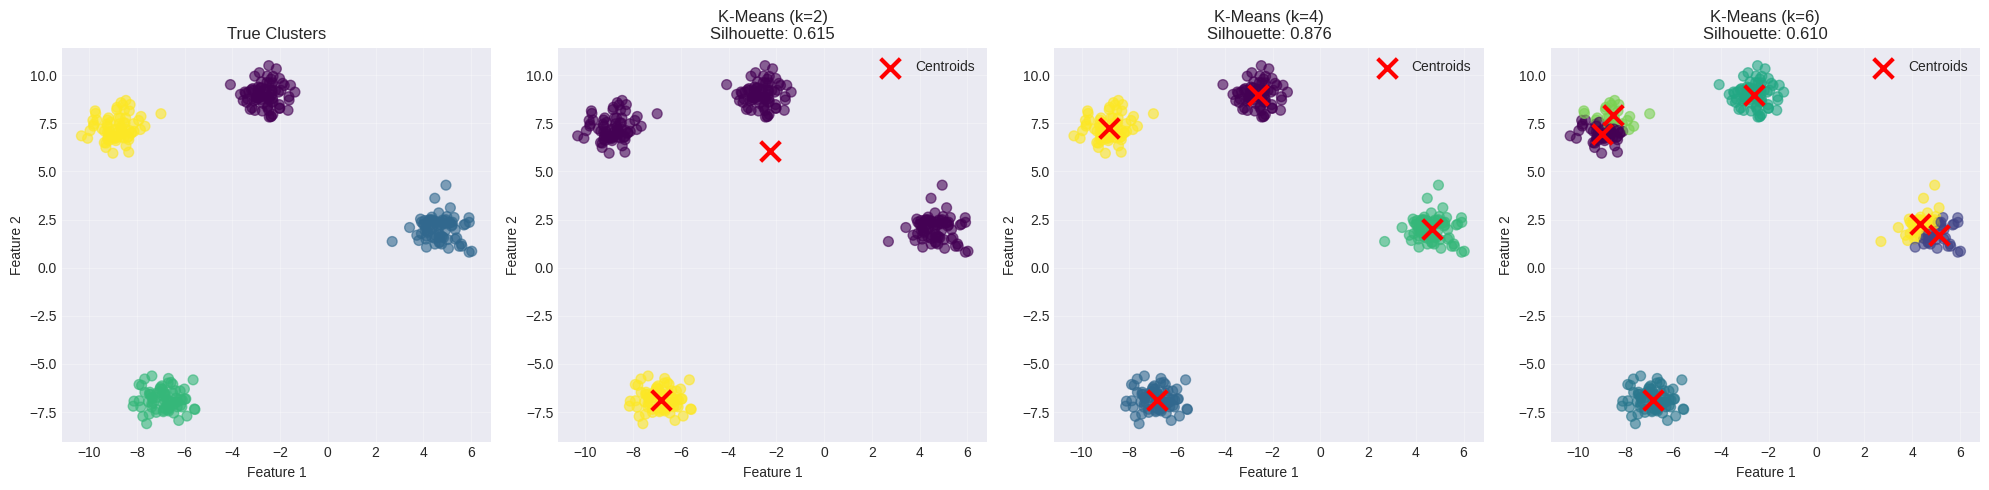

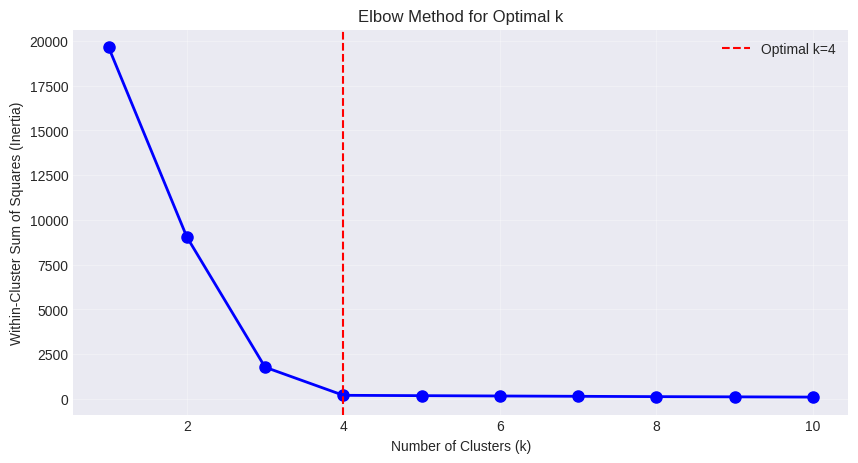

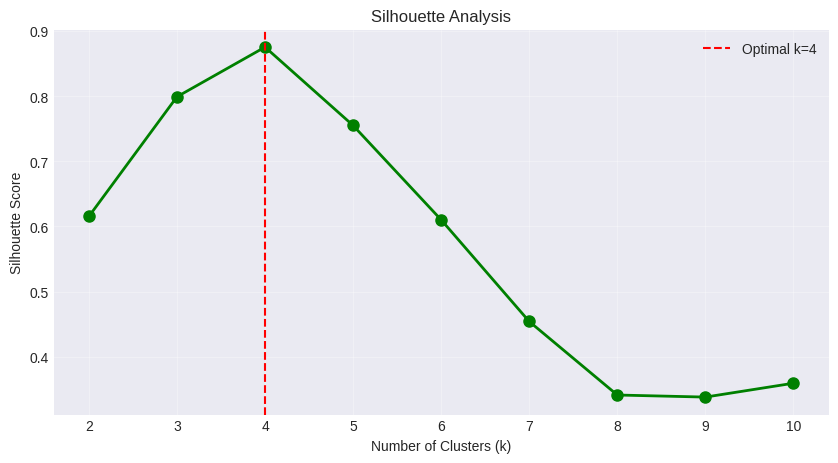


Optimal k based on silhouette score: 4
Best silhouette score: 0.876


In [ ]:
# Generate sample data with clear clusters
X_kmeans, y_true = make_blobs(n_samples=300, centers=4, n_features=2,
                               random_state=42, cluster_std=0.60)

# Visualize true clusters
plt.figure(figsize=(20, 5)) # Increased figure width to accommodate 4 subplots

plt.subplot(1, 4, 1) # Changed to 1 row, 4 columns
plt.scatter(X_kmeans[:, 0], X_kmeans[:, 1], c=y_true, cmap='viridis', s=50, alpha=0.6)
plt.title('True Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, alpha=0.3)

# K-Means with different k values
k_values = [2, 4, 6]
for idx, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    y_pred = kmeans.fit_predict(X_kmeans)

    plt.subplot(1, 4, idx+2) # Changed to 1 row, 4 columns
    plt.scatter(X_kmeans[:, 0], X_kmeans[:, 1], c=y_pred, cmap='viridis', s=50, alpha=0.6)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
               c='red', marker='x', s=200, linewidths=3, label='Centroids')
    plt.title(f'K-Means (k={k})\nSilhouette: {silhouette_score(X_kmeans, y_pred):.3f}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
print(" ")
# Elbow Method
inertias = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_kmeans)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.grid(True, alpha=0.3)
plt.axvline(x=4, color='r', linestyle='--', label='Optimal k=4')
plt.legend()
plt.show()
print(" ")

# Silhouette Analysis
silhouette_scores = []
k_range_silhouette = range(2, 11) # Start from 2 for silhouette score
for k in k_range_silhouette:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    y_pred = kmeans.fit_predict(X_kmeans)
    silhouette_scores.append(silhouette_score(X_kmeans, y_pred))

plt.figure(figsize=(10, 5))
plt.plot(k_range_silhouette, silhouette_scores, 'go-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.grid(True, alpha=0.3)
plt.axvline(x=4, color='r', linestyle='--', label='Optimal k=4')
plt.legend()
plt.show()

print(f"\nOptimal k based on silhouette score: {k_range_silhouette[np.argmax(silhouette_scores)]}")
print(f"Best silhouette score: {max(silhouette_scores):.3f}")

### Example 2: Hierarchical Clustering

Demonstrating hierarchical clustering with dendrogram:


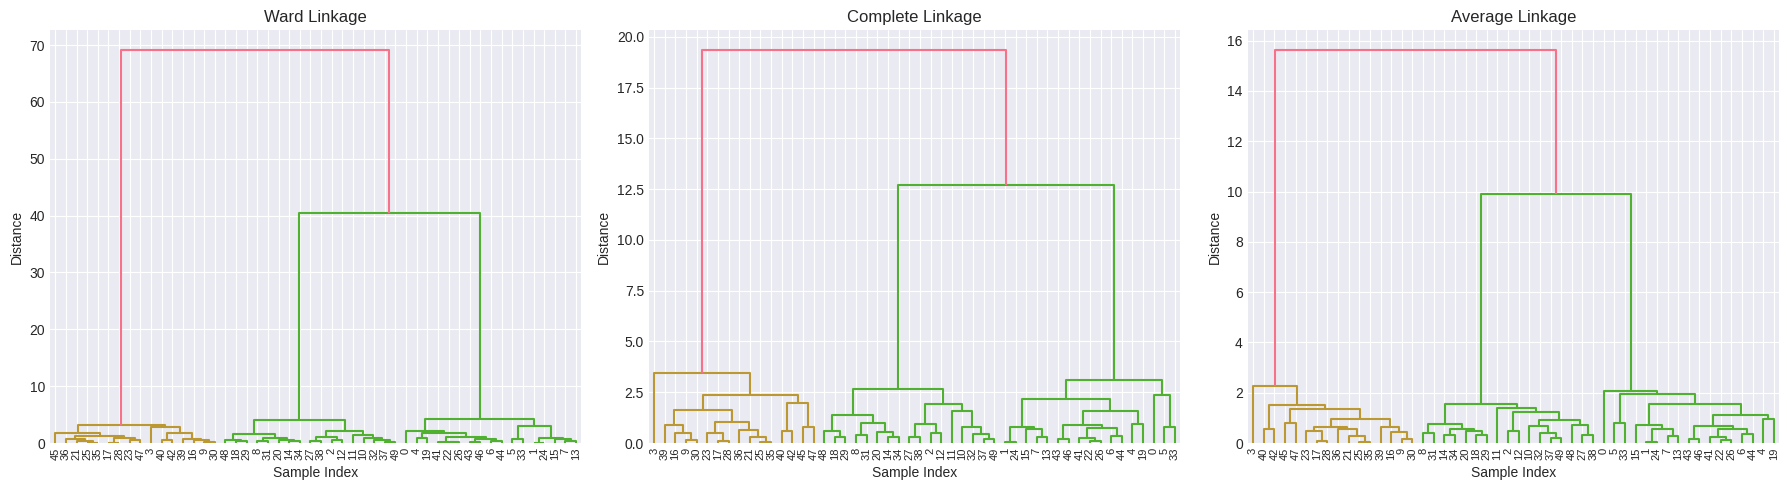

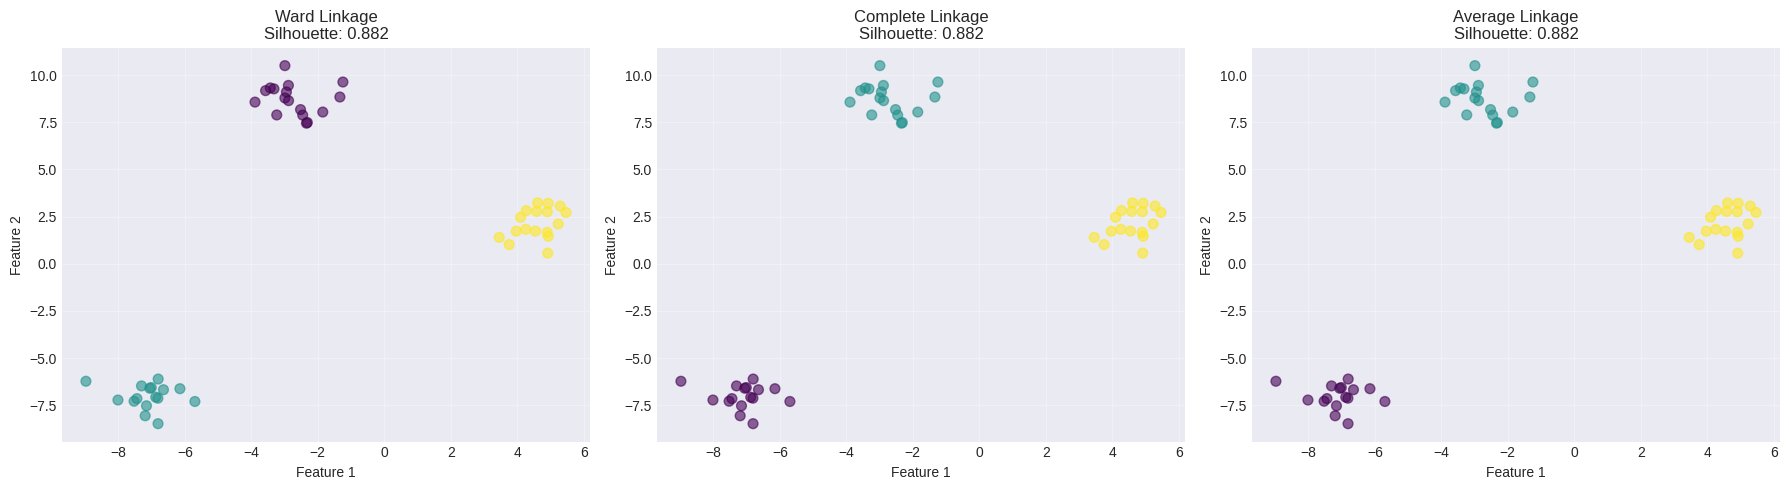


Observations:
- Ward linkage minimizes within-cluster variance (similar to K-Means)
- Complete linkage creates compact clusters
- Average linkage is a compromise between single and complete


In [ ]:
# Generate sample data
X_hier, y_hier = make_blobs(n_samples=50, centers=3, n_features=2,
                            random_state=42, cluster_std=0.8)

# Create dendrogram
linkage_types = ['ward', 'complete', 'average']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, linkage_type in enumerate(linkage_types):
    # Perform hierarchical clustering
    linkage_matrix = linkage(X_hier, method=linkage_type)

    # Plot dendrogram
    axes[idx].set_title(f'{linkage_type.capitalize()} Linkage')
    dendrogram(linkage_matrix, ax=axes[idx], leaf_rotation=90, leaf_font_size=8)
    axes[idx].set_xlabel('Sample Index')
    axes[idx].set_ylabel('Distance')

plt.tight_layout()
plt.show()
print(" ")
# Compare clustering results
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, linkage_type in enumerate(linkage_types):
    hierarchical = AgglomerativeClustering(n_clusters=3, linkage=linkage_type)
    y_pred = hierarchical.fit_predict(X_hier)

    axes[idx].scatter(X_hier[:, 0], X_hier[:, 1], c=y_pred, cmap='viridis', s=50, alpha=0.6)
    axes[idx].set_title(f'{linkage_type.capitalize()} Linkage\nSilhouette: {silhouette_score(X_hier, y_pred):.3f}')
    axes[idx].set_xlabel('Feature 1')
    axes[idx].set_ylabel('Feature 2')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nObservations:")
print("- Ward linkage minimizes within-cluster variance (similar to K-Means)")
print("- Complete linkage creates compact clusters")
print("- Average linkage is a compromise between single and complete")


### Example 3: DBSCAN Clustering

Demonstrating DBSCAN for non-spherical clusters:


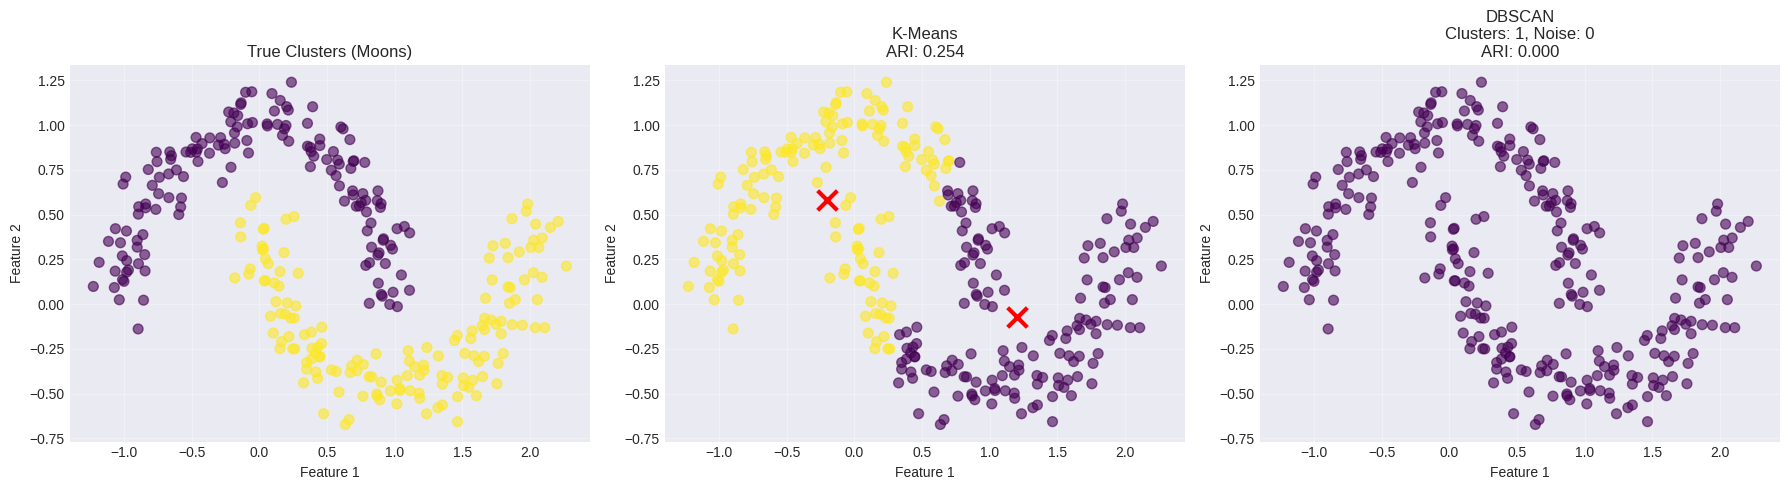

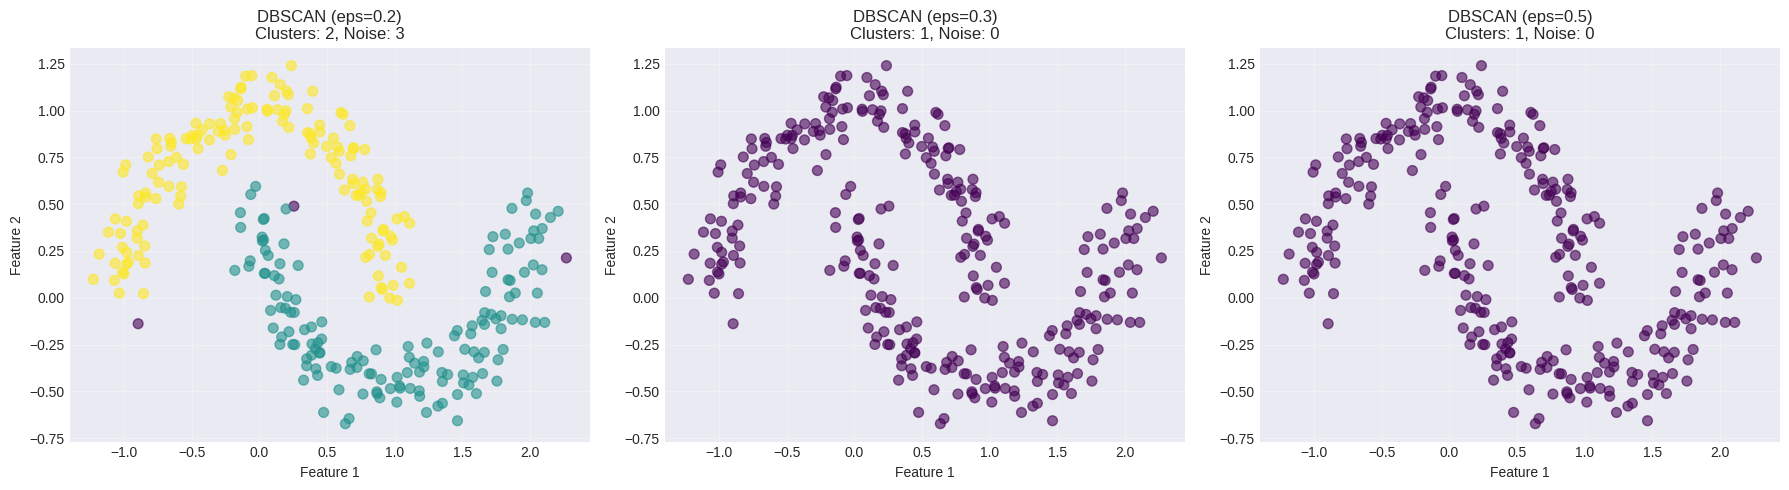


Observations:
- K-Means struggles with non-spherical clusters (assumes spherical)
- DBSCAN can find clusters of arbitrary shape
- DBSCAN automatically identifies outliers as noise
- eps parameter controls cluster size and density


In [ ]:
# Generate non-spherical clusters (moons)
X_dbscan, y_dbscan_true = make_moons(n_samples=300, noise=0.1, random_state=42)

# Compare K-Means vs DBSCAN
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# True clusters
axes[0].scatter(X_dbscan[:, 0], X_dbscan[:, 1], c=y_dbscan_true, cmap='viridis', s=50, alpha=0.6)
axes[0].set_title('True Clusters (Moons)')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].grid(True, alpha=0.3)

# K-Means (struggles with non-spherical)
kmeans_moons = KMeans(n_clusters=2, random_state=42, n_init=10)
y_kmeans = kmeans_moons.fit_predict(X_dbscan)
axes[1].scatter(X_dbscan[:, 0], X_dbscan[:, 1], c=y_kmeans, cmap='viridis', s=50, alpha=0.6)
axes[1].scatter(kmeans_moons.cluster_centers_[:, 0], kmeans_moons.cluster_centers_[:, 1],
               c='red', marker='x', s=200, linewidths=3)
axes[1].set_title(f'K-Means\nARI: {adjusted_rand_score(y_dbscan_true, y_kmeans):.3f}')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].grid(True, alpha=0.3)

# DBSCAN (handles non-spherical)
dbscan = DBSCAN(eps=0.3, min_samples=10)
y_dbscan = dbscan.fit_predict(X_dbscan)
n_clusters = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
n_noise = list(y_dbscan).count(-1)

axes[2].scatter(X_dbscan[:, 0], X_dbscan[:, 1], c=y_dbscan, cmap='viridis', s=50, alpha=0.6)
axes[2].set_title(f'DBSCAN\nClusters: {n_clusters}, Noise: {n_noise}\nARI: {adjusted_rand_score(y_dbscan_true, y_dbscan):.3f}')
axes[2].set_xlabel('Feature 1')
axes[2].set_ylabel('Feature 2')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Test different DBSCAN parameters
eps_values = [0.2, 0.3, 0.5]
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, eps in enumerate(eps_values):
    dbscan = DBSCAN(eps=eps, min_samples=10)
    y_pred = dbscan.fit_predict(X_dbscan)
    n_clusters = len(set(y_pred)) - (1 if -1 in y_pred else 0)
    n_noise = list(y_pred).count(-1)

    axes[idx].scatter(X_dbscan[:, 0], X_dbscan[:, 1], c=y_pred, cmap='viridis', s=50, alpha=0.6)
    axes[idx].set_title(f'DBSCAN (eps={eps})\nClusters: {n_clusters}, Noise: {n_noise}')
    axes[idx].set_xlabel('Feature 1')
    axes[idx].set_ylabel('Feature 2')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nObservations:")
print("- K-Means struggles with non-spherical clusters (assumes spherical)")
print("- DBSCAN can find clusters of arbitrary shape")
print("- DBSCAN automatically identifies outliers as noise")
print("- eps parameter controls cluster size and density")


### Example 4: Principal Component Analysis (PCA)

Demonstrating PCA for dimensionality reduction:


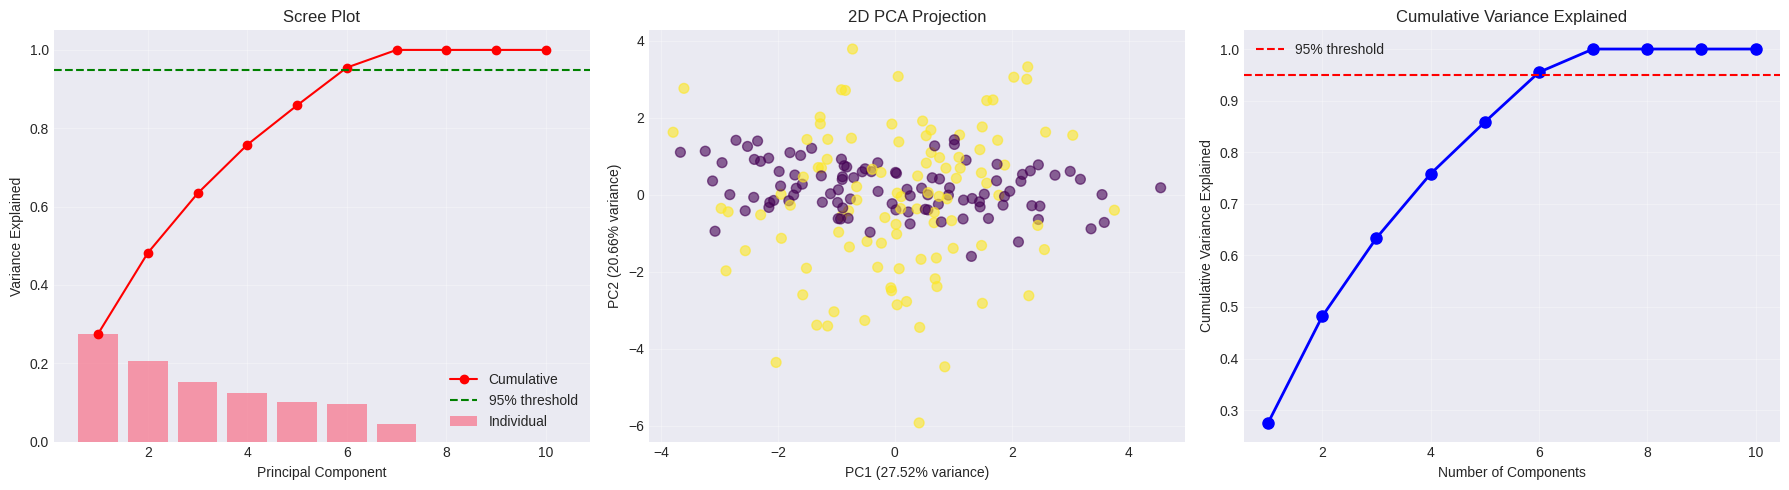


Number of components explaining 95% variance: 6
Variance explained by first 6 components: 95.49%

Original dimensions: 10
Reduced dimensions (95% variance): 6
Dimensionality reduction: 40.0%


In [ ]:
# Generate high-dimensional data
from sklearn.datasets import make_classification

X_pca, y_pca = make_classification(n_samples=200, n_features=10, n_informative=5,
                                   n_redundant=3, n_clusters_per_class=1,
                                   random_state=42)

# Standardize data (important for PCA)
scaler_pca = StandardScaler()
X_pca_scaled = scaler_pca.fit_transform(X_pca)

# Apply PCA
pca = PCA()
X_pca_transformed = pca.fit_transform(X_pca_scaled)

# Variance explained
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scree plot
axes[0].bar(range(1, 11), pca.explained_variance_ratio_, alpha=0.7, label='Individual')
axes[0].plot(range(1, 11), cumulative_variance, 'ro-', label='Cumulative')
axes[0].axhline(y=0.95, color='g', linestyle='--', label='95% threshold')
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Variance Explained')
axes[0].set_title('Scree Plot')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2D projection
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_pca_scaled)
axes[1].scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y_pca, cmap='viridis', s=50, alpha=0.6)
axes[1].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.2%} variance)')
axes[1].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.2%} variance)')
axes[1].set_title('2D PCA Projection')
axes[1].grid(True, alpha=0.3)

# Cumulative variance
axes[2].plot(range(1, 11), cumulative_variance, 'bo-', linewidth=2, markersize=8)
axes[2].axhline(y=0.95, color='r', linestyle='--', label='95% threshold')
axes[2].set_xlabel('Number of Components')
axes[2].set_ylabel('Cumulative Variance Explained')
axes[2].set_title('Cumulative Variance Explained')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find number of components for 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\nNumber of components explaining 95% variance: {n_components_95}")
print(f"Variance explained by first {n_components_95} components: {cumulative_variance[n_components_95-1]:.2%}")
print(f"\nOriginal dimensions: {X_pca_scaled.shape[1]}")
print(f"Reduced dimensions (95% variance): {n_components_95}")
print(f"Dimensionality reduction: {(1 - n_components_95/X_pca_scaled.shape[1])*100:.1f}%")


### Example 5: t-SNE Visualization

Demonstrating t-SNE for non-linear dimensionality reduction:


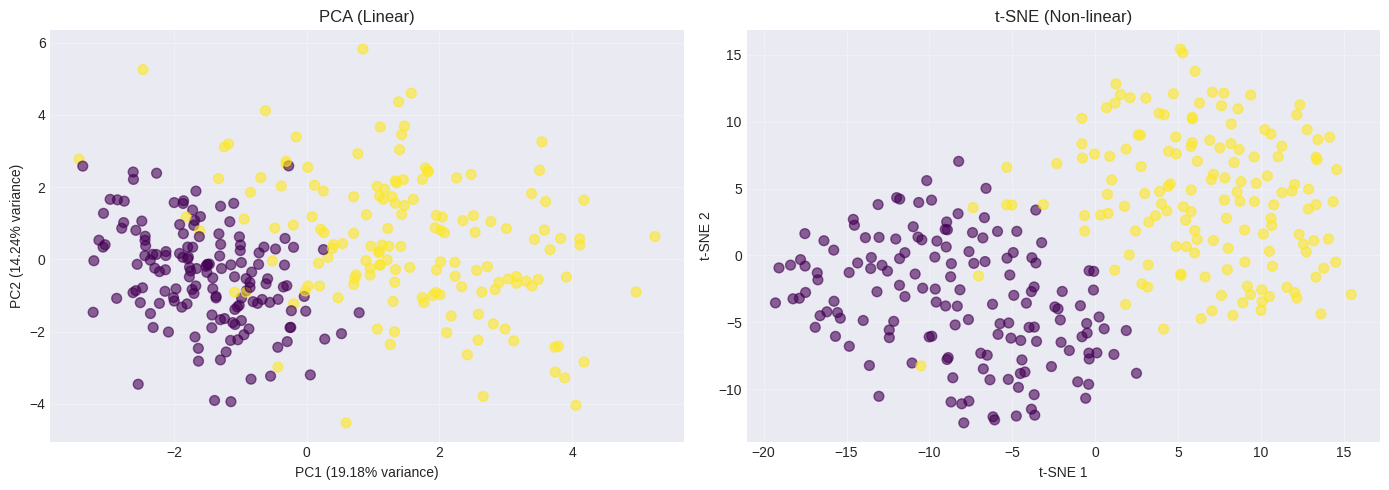

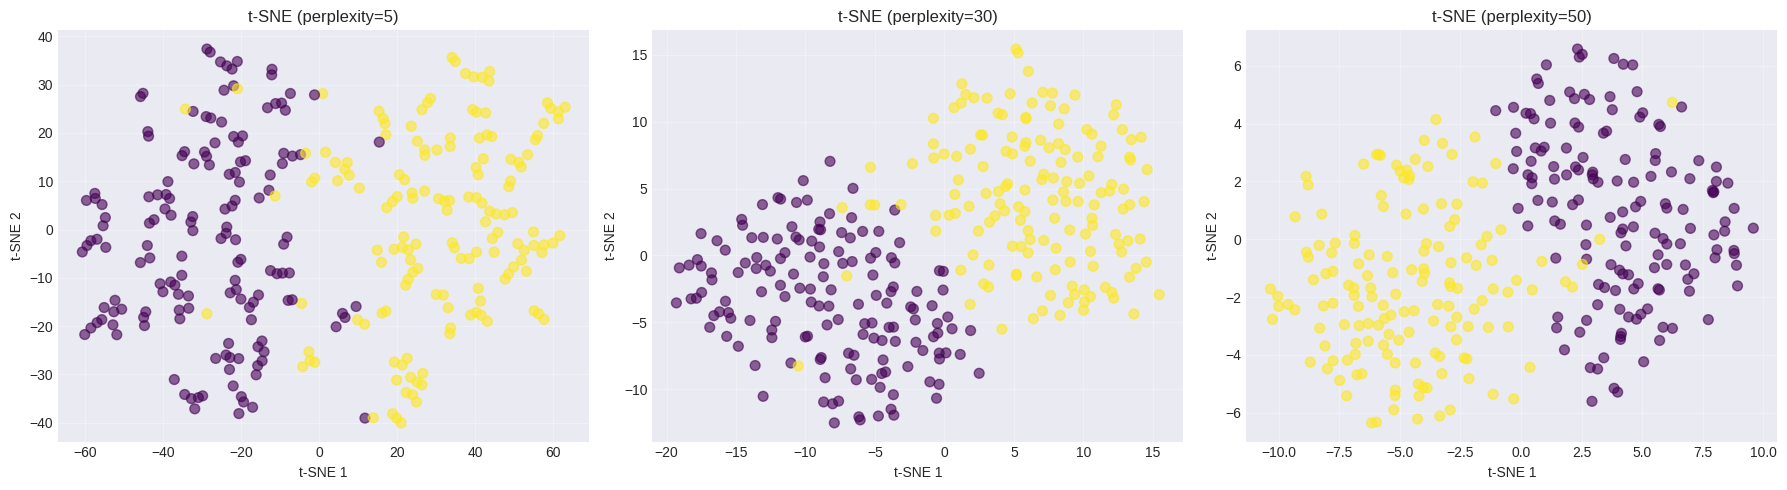


Observations:
- PCA preserves global structure but may miss non-linear patterns
- t-SNE preserves local neighborhoods, revealing cluster structure
- t-SNE is excellent for visualization but computationally expensive
- Perplexity controls balance between local and global structure
- t-SNE results can vary between runs (stochastic)


In [ ]:
# Generate complex high-dimensional data
X_tsne, y_tsne = make_classification(n_samples=300, n_features=20, n_informative=10,
                                     n_redundant=5, n_clusters_per_class=1,
                                     random_state=42)

# Standardize
scaler_tsne = StandardScaler()
X_tsne_scaled = scaler_tsne.fit_transform(X_tsne)

# Compare PCA vs t-SNE
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# PCA 2D
pca_tsne = PCA(n_components=2, random_state=42)
X_pca_2d_tsne = pca_tsne.fit_transform(X_tsne_scaled)
axes[0].scatter(X_pca_2d_tsne[:, 0], X_pca_2d_tsne[:, 1], c=y_tsne, cmap='viridis', s=50, alpha=0.6)
axes[0].set_xlabel(f'PC1 ({pca_tsne.explained_variance_ratio_[0]:.2%} variance)')
axes[0].set_ylabel(f'PC2 ({pca_tsne.explained_variance_ratio_[1]:.2%} variance)')
axes[0].set_title('PCA (Linear)')
axes[0].grid(True, alpha=0.3)

# t-SNE 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne_2d = tsne.fit_transform(X_tsne_scaled)
axes[1].scatter(X_tsne_2d[:, 0], X_tsne_2d[:, 1], c=y_tsne, cmap='viridis', s=50, alpha=0.6)
axes[1].set_xlabel('t-SNE 1')
axes[1].set_ylabel('t-SNE 2')
axes[1].set_title('t-SNE (Non-linear)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(" ")

# Test different perplexity values
perplexities = [5, 30, 50]
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, perp in enumerate(perplexities):
    tsne = TSNE(n_components=2, random_state=42, perplexity=perp)
    X_tsne_perp = tsne.fit_transform(X_tsne_scaled)

    axes[idx].scatter(X_tsne_perp[:, 0], X_tsne_perp[:, 1], c=y_tsne, cmap='viridis', s=50, alpha=0.6)
    axes[idx].set_xlabel('t-SNE 1')
    axes[idx].set_ylabel('t-SNE 2')
    axes[idx].set_title(f't-SNE (perplexity={perp})')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nObservations:")
print("- PCA preserves global structure but may miss non-linear patterns")
print("- t-SNE preserves local neighborhoods, revealing cluster structure")
print("- t-SNE is excellent for visualization but computationally expensive")
print("- Perplexity controls balance between local and global structure")
print("- t-SNE results can vary between runs (stochastic)")
